# Simulating Projectile motion (version 3.0)

#### Ver 1:
- The aim of the first version is to have a working implementation of the _Euler method_ for the motion of a projectile.
- the _input parameters_ are set in the code and the _output_ yields the final position and velocity of the projectile
- In the _evaluation_ we simply print out the error of the values obtained by the _Euler method_ when compared to the ones obtained using _SUVAT_

#### Ver 2:
- The aim of this second version is to improve the _output_ and _evaluation_ by saving and comparing the postion and velocity for each time step and plotting the data.

#### Ver 3:
- Add animated graphs using `matplotlib`

#### Ver 4:
- improved animations. (Simulated time = animation time, using a sensible number of frames)
- extended simulation and included Newton type friction

---

We first import `numpy` to work with vectors in Python conveniently and `matplotlib.pyplot` to be able to plot our results. 

In [3]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt

# Method for animating plots
from matplotlib.animation import FuncAnimation

# For jupyter notebooks: to display animations inline
from IPython.display import HTML

# This is a magic command for plots being plotted inline in the notebook.
%matplotlib inline

### Input

This is the part of our code were we set the _input parameters_ for our simulation.
- we need the initial position $r_0$ and velocity $v_0$
- we need to set the gravitational field strenght $g$
- we need to set the time step $\Delta t$

In [49]:
# Input

# initial position and velocity of the point particle
pos_init = np.array([.0, .0])
vel_init = np.array([20.0, 40.0])

# Set the acceleration g due to gravity
g = np.array([.0, -9.81])

# coefficient for friction
alpha = 0.01

Now we determine the time step $\Delta t$. For that we take the number of time steps $N$ as well as the final time $t_{final}$ as the input and calculate
$$
    \Delta t = \frac{t_{final}}{N}
$$

In [50]:
# Set the number N of time steps 
N = 10000
# Set a final time 
t_final = 8

dt = t_final/N

### Main

The main part of our code is the implementation of the _**Euler method**_. 
- In our fist implementation we simply run through a `for` loop for $N$ number of time steps. 
- In each run we update the postion vector implemented by `pos` and velocity vector implemented as `vel` via the *Euler method*:
$$
    \begin{align*}
        r(t+\Delta t) &\approx r(t) + v(t)\Delta t \\
        v(t+\Delta t) &\approx v(t) + g\Delta t
    \end{align*}
$$

- We update the `pos` and `vel` vectors directly for each time step
- For each time step we save the newly calculated position vector `pos` in a list `trajectory`. This list is the data structure representing the calculated _trajectory_, i.e. the path of the point particle, hence the name.
- For each time step we save the newly calculated velocity vector `vel` in a list `vel_data`. We shall use it later for comparing the numerical _Euler method_ with the analytical solution using _SUVAT_.

In [51]:
# Implementing the Euler method

# Calculates the acceleration
# Warning! Function depends on variables `alpha` and `g` defined outside of the function
def accel(pos, vel, t=0):
    return g - alpha*np.linalg.norm(vel)*vel

# Set the intial values for position and velocity
pos = pos_init
vel = vel_init

pos_norm = pos_init
vel_norm = vel_init

# List for saving the position for each time step for plotting and evaluation
trajectory = [pos]
trajectory_norm = [pos_norm]

# List for saving the velocity for each time step for plotting and evaluation 
vel_data = [vel]

# Calculate the new position and velocity for each time step and save them in the respective lists
for i in range(N):
    # Calculation of the trajectory without friction
    pos_norm = pos_norm + vel_norm*dt
    vel_norm = vel_norm + g*dt
    trajectory_norm.append(pos_norm)
    
    # Calculation of the trajectory with friction
    pos = pos + vel*dt
    vel = vel + accel(pos, vel)*dt
    trajectory.append(pos)
    vel_data.append(vel)


The vectors `pos` and `vel` contain now the approximations to $r(t_{final})$ and $v(t_{final})$ we have calculated with the _Euler method_. The list `trajectory` contains all the numerically calculated points for each time step ranging from $t=0$ until $t=t_{final}$ and is the approximation of the real trajectory obtained by the _Euler method_. Similarly, `vel_data` contains all the numeically calculated velocity vectors for each time step.

### Output

We improve the output by plotting the trajectory of our projectile we have calculated with the help of the _Euler method_. We make use of the `matplotlib` package and start with a simple basic plot.

To begin with we split the list `trajectory`  of position vectors into two tuples: the tuple `x` of all $x$-coordinates and the tuple `y` of all $y$-coordinates. This is called _tuple unpacking_ in Python. We do this as the plotting method `plt.plot` requires the $x$- and $y$-coordinates separately. We will use both tuples for the evaluation later as well.

##### Problem 1.
_Find a way to make the plot using [slicing](https://dev.to/duomly/what-is-slicing-in-python-58f2) of `trajectory` instead of tuple unpacking_ (Hint: You will need to convert the list `trajectory` into a `numpy` array first.)

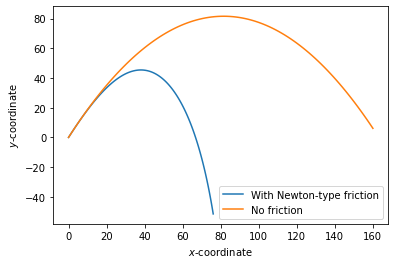

In [52]:
# Output: plot the trajectory of the projectile

# we 'unzip' the list of position vectors into two tuples of x- and y-components and plot the data
x,y = zip(*trajectory)

plt.plot(np.array(trajectory)[:N+1:(N+1)//100, 0], np.array(trajectory)[:N+1:(N+1)//100, 1], label = 'With Newton-type friction')
plt.plot(np.array(trajectory_norm)[:N+1:(N+1)//100, 0], np.array(trajectory_norm)[:N+1:(N+1)//100, 1], label = 'No friction')

plt.legend()

plt.xlabel("$x$-coordinate")
plt.ylabel("$y$-coordinate")

plt.show()

In [64]:
8//dt

9999.0

In [68]:
trajectory[int(6//dt)]

array([66.31918509,  1.72511901])

Trying to plot the velocity vectors in this way is not a helpful visualisation of the data. (_Try it out and see for yourself!_) Instead, we create separate plots of the $v_x$ and $v_y$ components of the velocity $v(t)$ as a function of time $t$.

For this we will need to create a `figure` object with two plots next to each other using the method `subplots` of `matplotlib.pyplot`. This methods returns a _tuple_ consisting of the `figure` object and (a tuple of) `Axes` objects. The `Axes` objects are the ones that have the `plot` method and are used for the respective plots.

Since we wish to plot the velocity components over time we need to create the respective time data `t_data` first. We could use a [list comprehension](https://www.programiz.com/python-programming/list-comprehension) to create `t_data`. However, we shall use the `numpy` method `linspace` instead. 

##### Animation of the trajectory

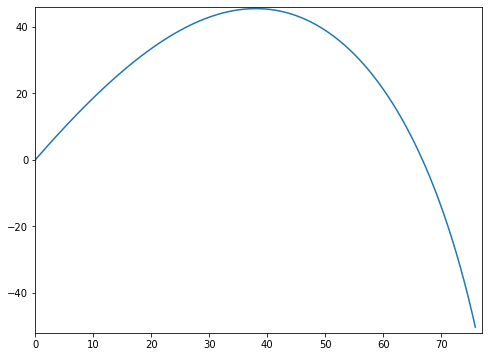

In [62]:
# Setting up the plotting figure
anim_fig, anim_ax = plt.subplots(figsize = (8,6))

# frames per second
fps = 25

# Saving the line2D object we will use for plots
line, = plt.plot([], [])

# Setting scale and range of coordinate axis. 
# To do: determine from inputs automatically
anim_ax.set_xlim(int(np.floor(np.min(x))), int(np.ceil(np.max(x))))
anim_ax.set_ylim(int(np.floor(np.min(y))), int(np.ceil(np.max(y))))

# Called for each frame to plot the data until the index `frame`
def update(frame):
    step = int(np.ceil(N/(t_final*fps))) # you migh get an index error
    line.set_data(x[:frame*step] , y[:frame*step])
    return line,

# create the animation object using the figure `anim_fig` by calling the function update for each value in the list `frame`
# Use 50 frames per second, so the delay between each frame is 20 ms
ani = FuncAnimation(anim_fig, update, frames=range(np.around(t_final*fps)), interval = 1000//fps,
                     blit=True)

HTML(ani.to_html5_video())

In [ ]:
# Plotting the v_x and v_y components over time

# We create a figure with two plots next to each other
# fig is the figure object, ax is the axes object which we use to plot in
fig, ax = plt.subplots(1,2, figsize= (15,4)) 

# we 'unzip' the list of velocity vectors into two tuples of v_x- and v_y-components
vx, vy = zip(*vel_data)

# we create the time data using linspace (look up what it does!)
t_data = np.linspace(0, t_final, N+1)

ax[0].set_xlabel("time $t$", fontsize=12)
ax[0].set_ylabel("$v_x$", fontsize=14)
ax[0].plot(t_data, vx)

ax[1].set_xlabel("time $t$", fontsize=12)
ax[1].set_ylabel("$v_y$", fontsize=14)
ax[1].plot(t_data, vy)

# plot the results
plt.show()

We can see from the graphs that the $v_x$ component stays constant, whereas the $v_y$ component decreases uniformly from the initial value $v_{0,y}$ as we would expect.

### Evaluation

The main reason why we have picked the well-known _projectile motion_ for our first simulation is because we can use the _SUVAT_ equations to calculate the position and velocity for each time $t$ directly and compare this with the results of the _Euler method_. 

#### Position
Using _SUVAT_ the position $r(t)$ for each time $t$ is given by:

$$
  r(t) = r_0 + v_0\, t + \frac{1}{2}g\, t^2
$$

Firstly, we compare the trajectories obtained by the _Euler method_ with the one obtained analytically from _SUVAT_ by plotting both in the same graph. We will create the data for the trajectory `trajectory_analytic` calculated from _SUVAT_ using a  [list comprehension](https://www.programiz.com/python-programming/list-comprehension). There are two things we have to be careful about

1. Unlike the _Euler method_ that uses the time step $\Delta t$, the _SUVAT_ equation needs the time $t$ at each step as a parameter. We can calculate $t$ by multiplying $\Delta t$ with the number of the current time step $k$

$$ t = \Delta t \cdot k$$

2. Although we run through $N$ time steps, the length of our list is $N+1$ as it includes the initial value, too. We have to run our _SUVAT_ calculation for $N+1$ steps to match that. 

In [ ]:
# Compare the trajectories calculated with Euler vs SUVAT

# Calculate the trajectory using SUVAT and a list comprehension
trajectory_analytic = [pos_init + vel_init * (k*dt) + 1/2 * g * (k*dt)**2 for k in range(N+1)]

# Use tuple unpacking to obtain tuples of x- and y-coordinates of the list of position vectors
x_analytic, y_analytic = zip(*trajectory_analytic) 

# Plot both trajectories in one graph
plt.plot(x,y, label = 'Euler')
plt.plot(x_analytic, y_analytic, label = 'Analytic')

# Show the legend and the graph
plt.legend()
plt.show()


Unless we decrease the number of time steps $N$ to $100$ or less no difference can be spotted by plotting the two trajectories in one plot. To analyse and visualise the differences between both trajectories we calculate the differences $\Delta x$ and $\Delta y$ for each time step and plot the results. 

In [63]:
# Calculate the differences in x and y values for the analytic and the Euler data

# As both are tuples and thus immutable we need to convert them to numpy arrays first, 
# if we wish to take the componentwise difference without using a `for` loop
x_err = np.array(x) - np.array(x_analytic)
y_err = np.array(y) - np.array(y_analytic)

# We create a figure with two plots next to each other
# fig is the figure object, ax is the axes object which we use to plot in
fig, ax = plt.subplots(1,2, figsize= (15,4)) 

# Using f-strings allows us to include the value of variables like `dt` in the string of a label. 
# This way we don't have to change it manually in the string when we change the values in the input section.
# An f-string is indicated by the leading `f` and variables are included using curly brackets
ax[0].set_xlabel(f"number of time steps for $\Delta t$ = {dt}s", fontsize=14)
ax[0].set_ylabel("$\Delta x$", fontsize=14)
ax[0].plot(x_err)

ax[1].set_xlabel(f"number of time steps for $\Delta t$ = {dt}s", fontsize=14)
ax[1].set_ylabel("$\Delta y$", fontsize=14)
ax[1].plot(y_err)

# plot the results
plt.show()

NameError: name 'x_analytic' is not defined

With $N =10\,000$ steps and a time step $\Delta t=4\,ms$ the calculated final position and the numerically obtained final postion agree in at least $11$ decimal places in the $x$ component and in $2$ decimal places in the $y$ component. 

The graph confirms what we have guessed in _version 1_ about the error in the $y$ component: the error grows linearly with the number of steps $N$ for a fixed $\Delta t$, which makes long term predictions unreliable. 
To keep the error the same for increasing times $t_{final}$ we need to make $\Delta t$ smaller. This means that we have to keep increasing the number $N$ of steps by a greater factor than we increase the time $t_{final}$. 

##### Problem 2.
_Run the code with different guesses for $N$ when doubling, tripling, ... the current value of $t_{final}$ while keeping the errorthe same to $\Delta y\leq 0.008$. Use your data to estimate the relationship between $N$ as a function of $t_{final}$. You can also try to find this relationship by studying how the error propagates using calculus. In this case check your analytical result by testing it with the code._

##### **Q:** _Why does the graph of the $\Delta x$ error look so weird?_
First of all, we notice that the error $\Delta x$ in the $x$ components is much much smaller than the $y$ component. This is because the $x$ component grows linearly (affine) with time in this case. Indeed, by rewriting the _SUVAT_ equation in component form 

$$
	r(t) = \begin{pmatrix} r_x(t) \\ r_y(t)\end{pmatrix} = \begin{pmatrix} r_{0,x} \\ r_{0,y}\end{pmatrix} + \begin{pmatrix} v_{0,x} \\ v_{0,y}\end{pmatrix}t + \frac{1}{2}\begin{pmatrix} 0 \\ -9.81\end{pmatrix}t^2
$$

we find for the $x$ component

$$
    r_x(t) = r_{0,x}  +  v_{0,x}t
$$

which is a linear (affine) relationship. Since $t_{final} = N\,\Delta t$ we have

$$
    \sum_{j=1}^N v_{0,x}\Delta t = N\,v_{0,x}\Delta t = v_{0,x} t_{final}
$$

In other words, adding the vector $v_{0,x}\Delta t$ every single iteration of the `for` loop (i.e. $N$ times) in the _Euler method_ or multiplying the vector $v_{0,x}$ with the final time $t_{final}$ yields the same result. Both are mathematically equivalent.

Since both are mathematically equivalent the error $\Delta x$ should be zero throughout; _but why is there an error regardless and why is the graph jumping like this?_ The very small difference in the $x$ components of the position vectors is due to rounding and representation errors in a computer. We are storing the numbers as [_floating points_](https://docs.python.org/3/tutorial/floatingpoint.html) (floats) and the computer only stores a fixed number of digits per number (it uses 64 bits). This means that during each operation with floats precision errors can occur. When calculating the final velocity with _SUVAT_ we only use three operations, but for the _Euler method_ we use $2\times 10\,000$ operations leading to a miniscule difference in the numerical result due to this error, although both methods are mathematically equivalent!

##### **Note:**

1. _When calculating numerically using a computer two mathematically equivalent ways of obtaining a result might not produce the same numerical result! In fact, one method might be much more suitable for a problem than another because it has a much better error propagation._

2. _When we want to do high-precision arithmetic or require very precise simulations it is very important to think about how to represent the numbers in a computer to avoid such errors. In that case we would not be using floats. However, for our purposes the error from the floating point arithmetic is negligible as we have seen._

#### Velocity

We turn to comparing the velocities obtained with the _Euler method_ and _SUVAT_

$$
    v(t) = v_0 + g\,t
$$

The code for this is essentially the same as for position.

In [3]:
# Compare the velocities calculated with Euler vs SUVAT

# Calculate the velocities for each time step using SUVAT and a list comprehension
vel_analytic = [vel_init  +  g * (k*dt) for k in range(N+1)]

# Use tuple unpacking to obtain tuples of x- and y-coordinates of the list of velocity vectors
vx_analytic, vy_analytic = zip(*vel_analytic) 
 
# We calculate the componentwise differences using vectors instead of a `for` loop
vx_err = np.array(vx) - np.array(vx_analytic)
vy_err = np.array(vy) - np.array(vy_analytic)

# We create a figure with two plots next to each other
# fig is the figure object, ax is the axes object which we use to plot in
fig, ax = plt.subplots(1,2, figsize= (15,4)) 

# Using f-strings we include the value of variable `dt` in the string of a label. 
ax[0].set_xlabel(f"number of time steps for $\Delta t$ = {dt}s", fontsize=14)
ax[0].set_ylabel("$\Delta v_x$", fontsize=14)
ax[0].plot(vx_err)

ax[1].set_xlabel(f"number of time steps for $\Delta t$ = {dt}s", fontsize=14)
ax[1].set_ylabel("$\Delta v_y$", fontsize=14)
ax[1].plot(vy_err)

plt.show()

NameError: name 'N' is not defined

We can see that the velocity obtained by the _Euler method_ agrees with the one we have obtained from _SUVAT_ apart from numerical errors. As the $v_x$ component remains unchanged in both methods, the error $\Delta v_x$ is zero. 

The error in he $v_y$ components is very small and both values agree for $11$ significant figures at least. Mathematically speaking we have the same situation as for $\Delta x$: $v_y$ is a linear (affine) function of the time $t$. Therefore, the _Euler method_ and _SUVAT_ are mathematically equivalent in this case. However, they are not _numerically equivalent_ due to the vastly different number of operations involved in the _Euler method_ compared to _SUVAT_ and the rounding and representation error of real numbers using floats. Such errors are called **machine word error** in numerical maths.  


##### Problem 3.
In this version 2 we have refrained from saving the time information and have only iterated over the number of time steps $N$. Recall that this has caused us some minor inconveniences when calculating the position and velocities using _SUVAT_, as the equations require the time as parameter and not just the time step $\Delta t$ that has been sufficient for the _Euler method_ so far. The aim of this problem is to simplify the code by introducing _time_, which we will need in the future as well.
1. Research the method `linspace()` of the `numpy` package and think how it can be used to represent the time data.
2. Use the inputs `N` and `t_final` to create a `numpy` array `time` representing the time using `linspace()`.
3. Rewrite all the `for` loops to iterating over `time` rather then the number of time steps. Simplify any other parts of the code you notice.
4. Check whether the code has indeed become simpler and more uniform. If it has not, then go back and think how you could make it simpler.
